In [18]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as pp
from neupy.algorithms import GRNN as grnn
from neupy.estimators import mse

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 外部验证

In [22]:
data_evaluation =pd.read_excel('/Users/Evan/DataScience/TB_Nation/Seasonal_GRNN.xlsx',index_col='Date')[-12:]

In [23]:
data_evaluation

,Incidence_rate,forecast,NN
Date,,,
2014-01-01,6.576894,6.673836,6.613922
2014-02-01,5.693240,5.735268,5.643846
2014-03-01,6.233394,6.345317,6.192168
2014-04-01,6.017185,6.262331,6.078381
2014-05-01,5.868642,6.062793,5.902023
2014-06-01,5.635166,5.606478,5.642497
2014-07-01,5.505367,5.531027,5.368308
2014-08-01,5.249826,5.468642,5.375860
2014-09-01,4.950454,5.122056,5.152767


In [25]:
## 绝对误差
data_evaluation['Dist_ARIMA'] =abs(data_evaluation['forecast']-data_evaluation['Incidence_rate'])
data_evaluation['Dist_NN'] = abs(data_evaluation['NN']-data_evaluation['Incidence_rate'])
data_evaluation['Better'] = data_evaluation['Dist_ARIMA']  - data_evaluation['Dist_GRNN'] 

data_evaluation['error_ARIMA'] = data_evaluation['forecast']-data_evaluation['Incidence_rate']
data_evaluation['error_GRNN'] = data_evaluation['NN']-data_evaluation['Incidence_rate']

## 相对误差
data_evaluation['ARIMA_per']  = (data_evaluation['Dist_ARIMA']/data_evaluation['Incidence_rate'])*100
data_evaluation['NN_per'] = (data_evaluation['Dist_NN']/data_evaluation['Incidence_rate'])*100

print(np.mean(data_evaluation['ARIMA_per']))
print(np.mean(data_evaluation['NN_per']))

2.43136743292
1.22457613915


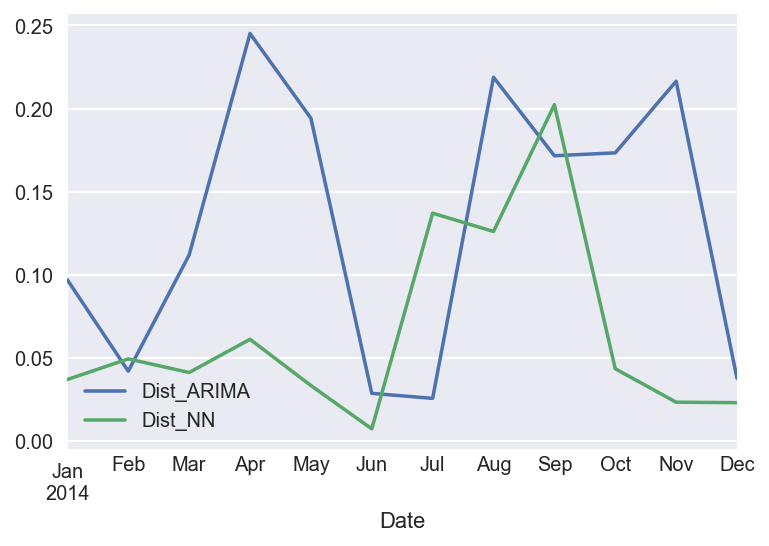

In [27]:
data_evaluation[['Dist_ARIMA','Dist_NN']].plot()

In [28]:
np.mean(data_evaluation['Dist_ARIMA'])

0.13020384563589063

In [29]:
np.mean(data_evaluation['Dist_GRNN'])

0.065404641567472721

In [30]:
sum(data_evaluation['Better']>0)

9

In [31]:
sum(data_evaluation['Better'])

0.77759044882101502

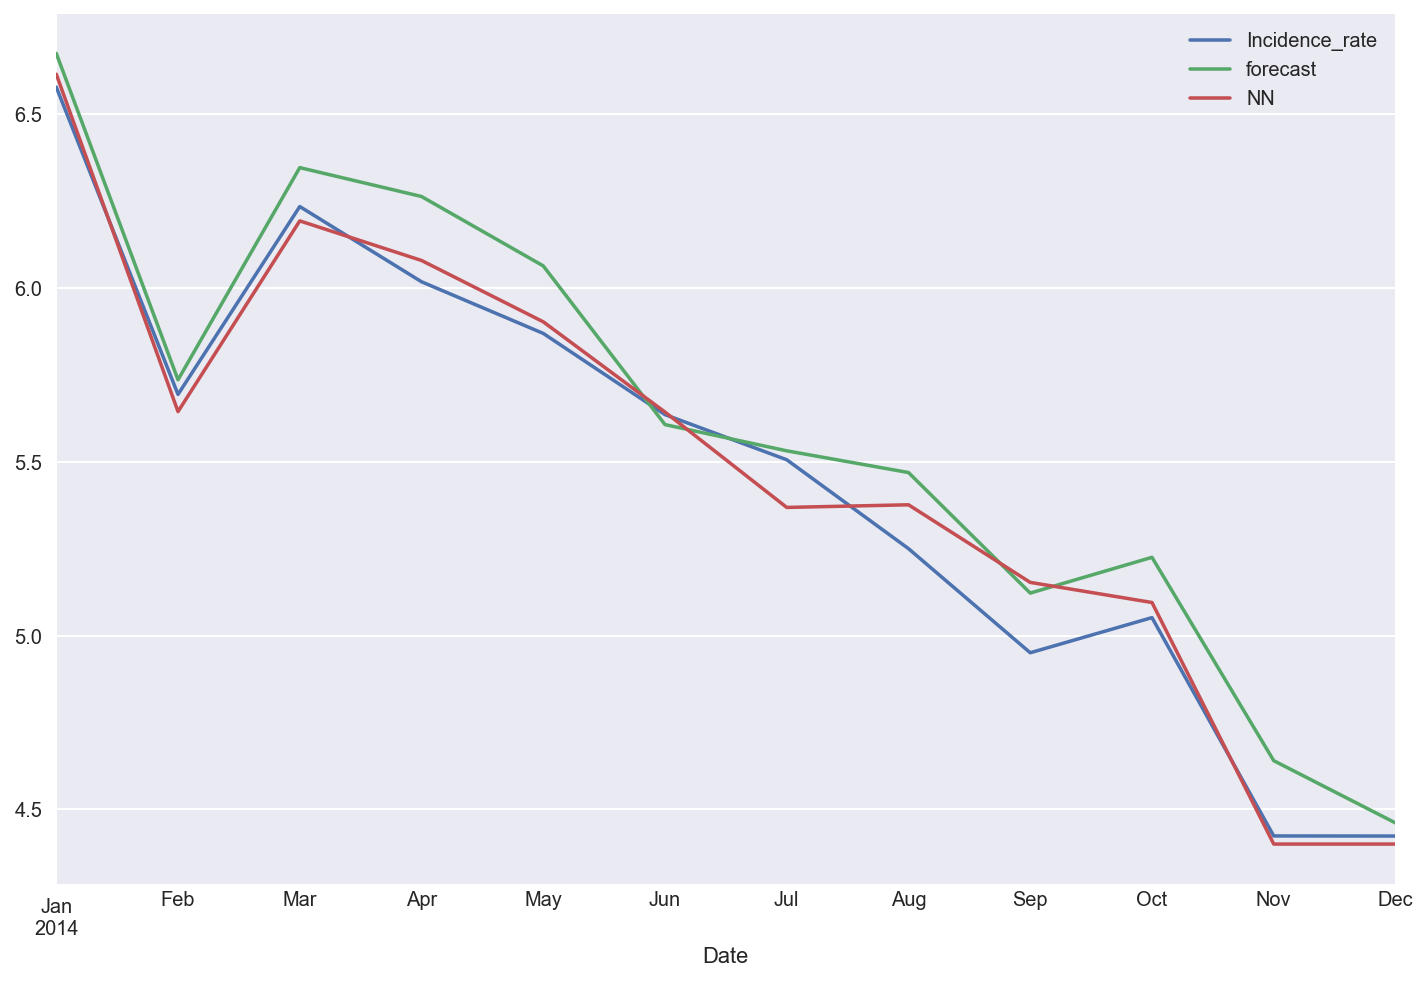

In [32]:
data_evaluation[['Incidence_rate','forecast','NN']].plot(figsize=(12, 8)) 

### 内部验证

In [26]:
data_intro =pd.read_excel('data_GRNN.xlsx',index_col='Date')[:-12]

In [27]:
## 绝对误差
data_intro['Dist_ARIMA'] =abs(data_intro['forecast']-data_intro['Incidence_rate'])
data_intro['Dist_GRNN'] = abs(data_intro['NN']-data_intro['Incidence_rate'])
data_intro['Better'] = data_intro['Dist_ARIMA']  - data_intro['Dist_GRNN'] 

## 相对误差
data_intro['ARIMA_per']  = (data_intro['Dist_ARIMA']/data_intro['Incidence_rate'])*100
data_intro['GRNN_per'] = (data_intro['Dist_GRNN']/data_intro['Incidence_rate'])*100

In [28]:
np.mean(data_intro['Dist_ARIMA'])

0.33805778418808308

In [29]:
np.mean(data_intro['Dist_GRNN'])

0.19426236290533566

In [30]:
np.mean(data_intro['Better']>0)

0.66315789473684206

In [31]:
sum(data_intro['Better'])

13.660565021861002

In [32]:
np.mean(data_intro['Better'])/data_intro['Incidence_rate'].mean()*100

2.2108558449049052

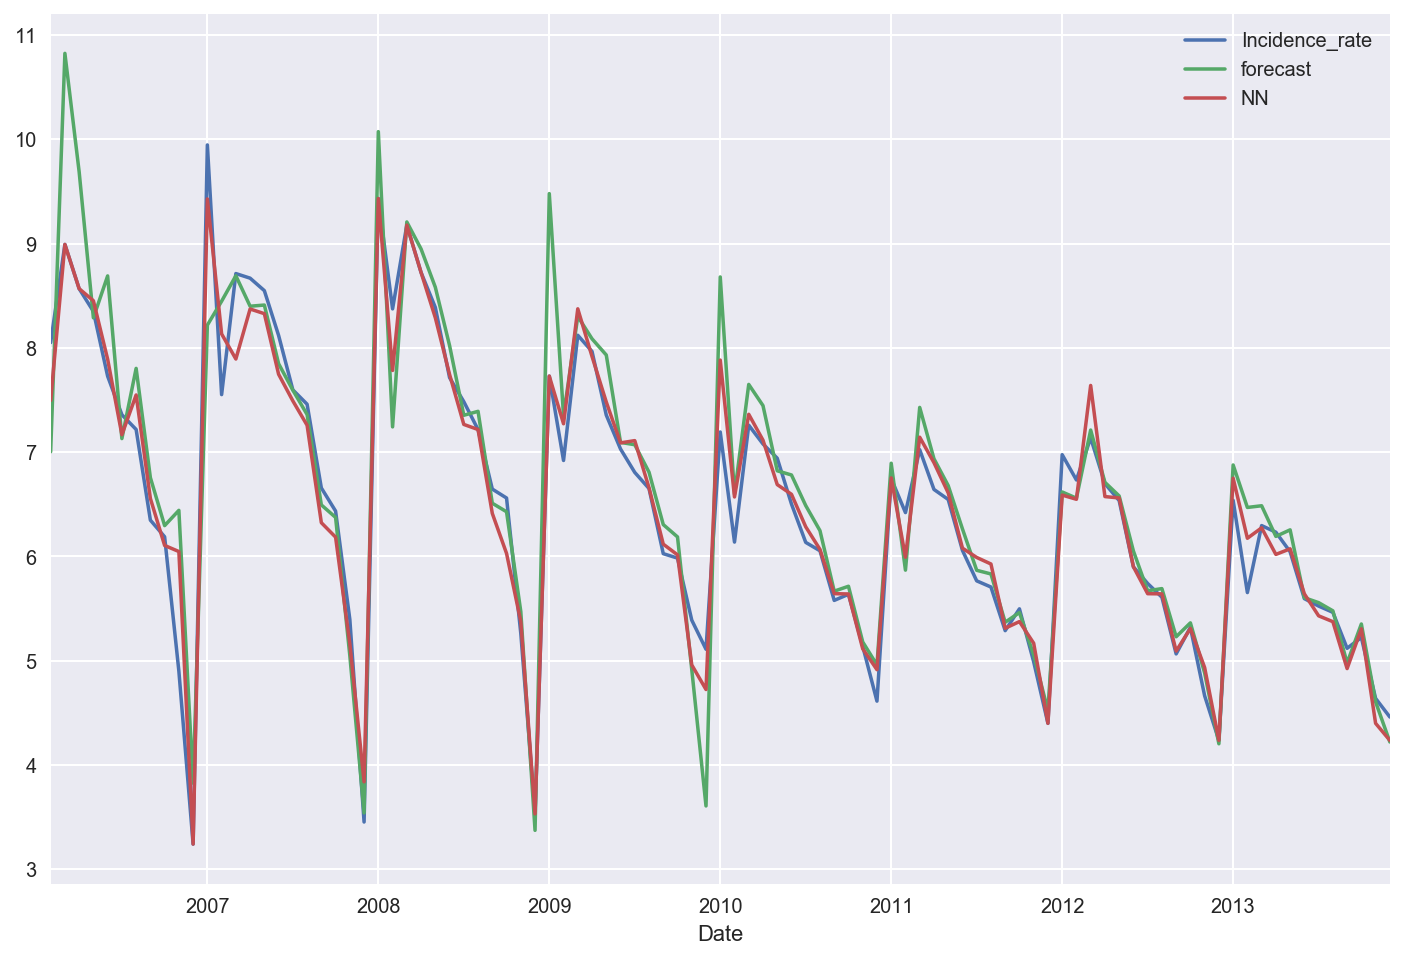

In [33]:
data_intro[['Incidence_rate','forecast','NN']].plot(figsize=(12, 8)) 

### 数据集验证

In [34]:
data_total =pd.read_excel('data_GRNN.xlsx',index_col='Date')

In [35]:
## 绝对误差
data_total['Dist_ARIMA'] = abs(data_total['forecast']-data_total['Incidence_rate'])
data_total['Dist_GRNN'] = abs(data_total['NN']-data_total['Incidence_rate'])
data_total['Better'] = data_total['Dist_ARIMA']  - data_total['Dist_GRNN'] 
data_total['error_ARIMA'] = data_total['forecast']-data_total['Incidence_rate']
data_total['error_GRNN'] = data_total['NN']-data_total['Incidence_rate']

## 相对误差
data_total['ARIMA_per']  = (data_total['Dist_ARIMA']/data_total['Incidence_rate'])*100
data_total['GRNN_per'] = (data_total['Dist_GRNN']/data_total['Incidence_rate'])*100

In [36]:
np.mean(data_total['Dist_ARIMA'])

0.31474706210746334

In [37]:
np.mean(data_total['Dist_GRNN'])

0.17981102967118279

In [38]:
np.mean(data_total['Better']>0)

0.67289719626168221

In [39]:
sum(data_total['Better'])

14.438155470682013

In [40]:
np.mean(data_total['Better'])/data_total['Incidence_rate'].mean()*100

2.1123403410597494

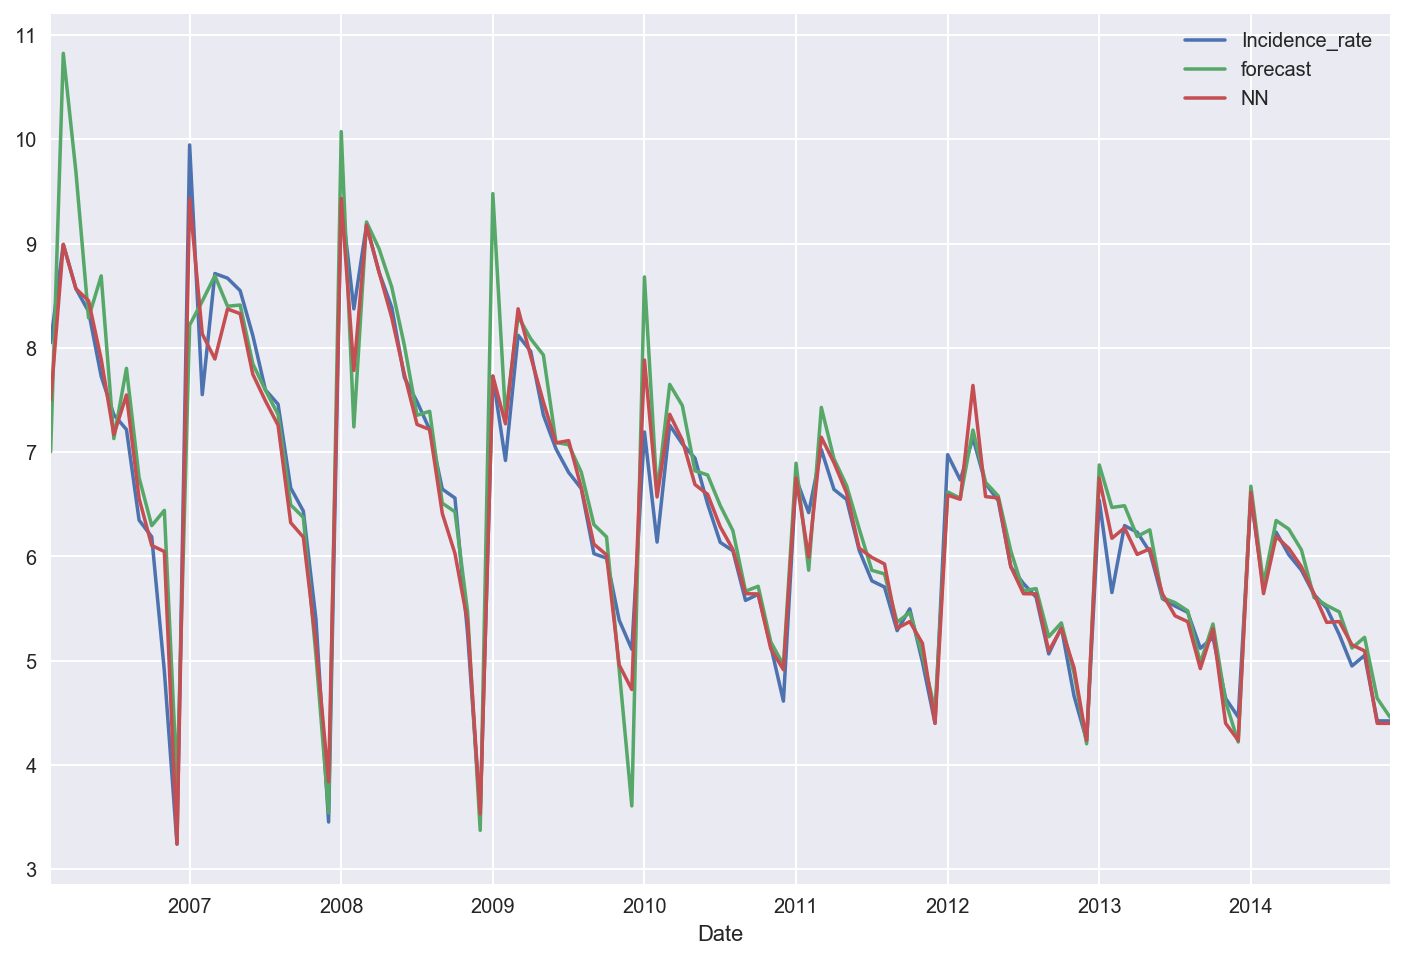

In [41]:
data_total[['Incidence_rate','forecast','NN']].plot(figsize=(12, 8)) 

### 残差检验

In [42]:
data_total[['Dist_ARIMA','Dist_GRNN']]

,Dist_ARIMA,Dist_GRNN
Date,,
2006-02-01,1.046743,5.539894e-01
2006-03-01,1.831927,0.000000e+00
2006-04-01,1.121004,7.224495e-06
2006-05-01,0.061619,1.020888e-01
2006-06-01,0.961425,1.630721e-01
2006-07-01,0.228896,1.916758e-01
2006-08-01,0.585976,3.309162e-01
2006-09-01,0.407226,2.078668e-01
2006-10-01,0.107016,8.292992e-02


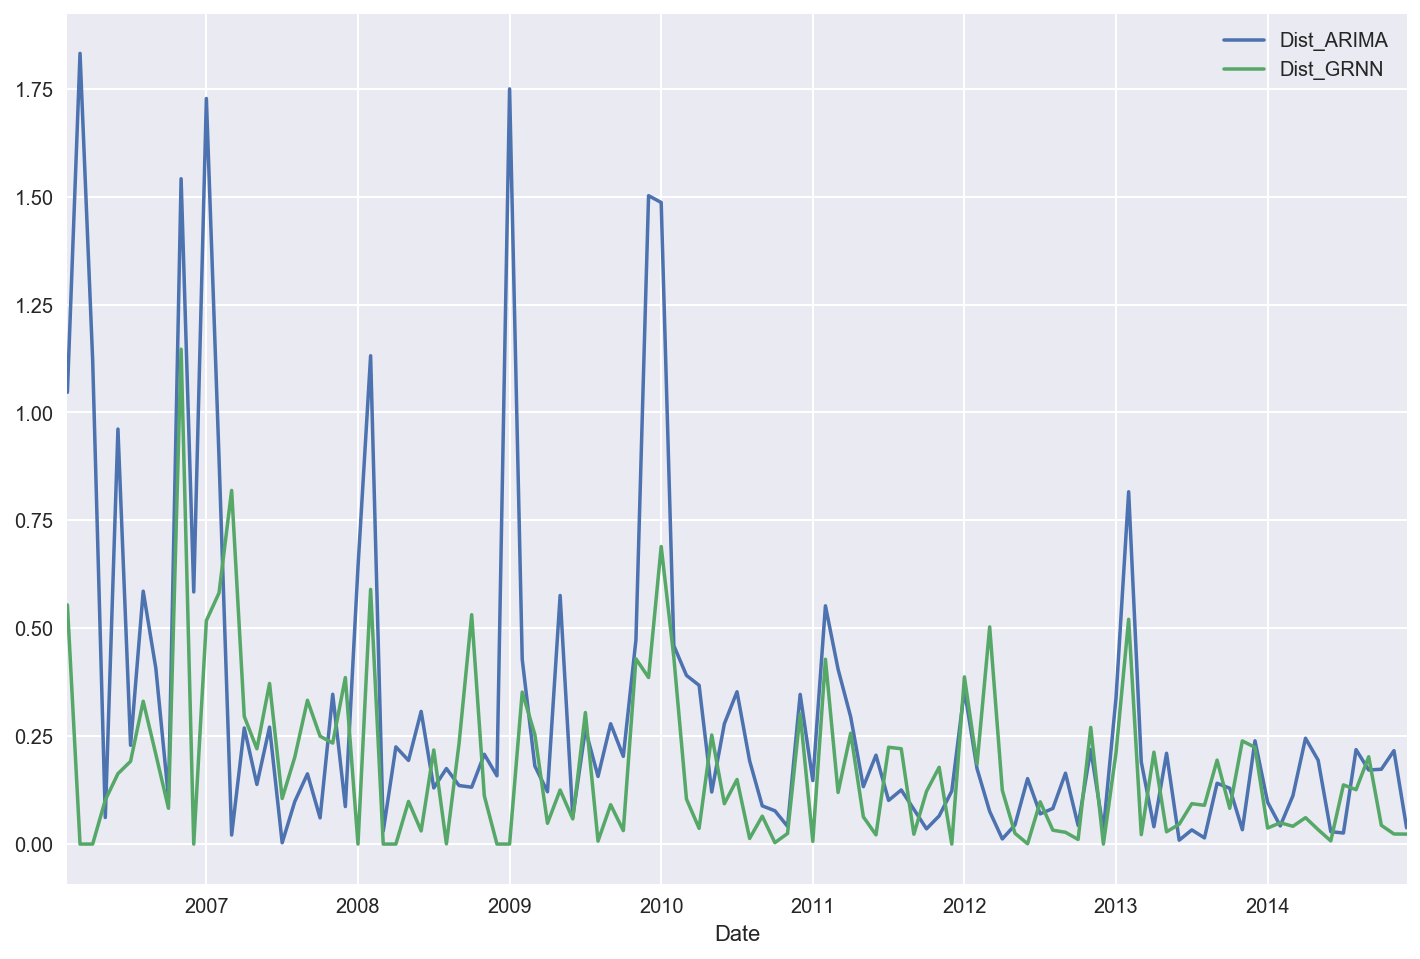

In [43]:
data_total[['Dist_ARIMA','Dist_GRNN']].plot(figsize=(12, 8)) 